In [1]:
import numpy as np
import pandas
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

import kagglehub
from kagglehub import KaggleDatasetAdapter

c:\Users\ttjaa\Documents\College Part II\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
##################################################
##### STEP 1: PREPARING FEATURES AND TARGET ######
##################################################

file_path = "breast-cancer.csv"

# Load the dataset
data_frame = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/breast-cancer-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# print("First 5 records:\n", data_frame.head())

data_frame.dropna(inplace=True)

X = data_frame.drop(columns=["id", "diagnosis"])
y = data_frame["diagnosis"] # if this doesn't work use y = data_frame.drop(columns=X.columns)
# y = pd.Seriesy.str.replace("M", "1").str.replace("B", "0")
y.replace("M", "1", inplace=True)
y.replace("B", "0", inplace=True)

features = X.columns

y = (pandas.DataFrame)(y)

print(f"X: {X}")
print(f"y: {y}")

X:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  

In [3]:
##################################################
############ STEP 2: TRAIN-TEST SPLIT ############
##################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [4]:
##################################################
############# STEP 3: NORMALIZATION ##############
##################################################

scaler = StandardScaler().fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train: {X_train}")
print(f"y_train: {y_train}")
print(f"X_test: {X_test}")
print(f"y_test: {y_test}")

X_train: [[-0.46415795 -0.54548976 -0.53176217 ... -1.2808174  -1.57143089
  -1.3367815 ]
 [ 0.62420407  0.32892045  0.63412947 ...  0.70614179  0.33380242
  -0.08462995]
 [ 0.36911922  0.81208512  0.35810565 ...  0.5425746  -0.53322139
  -0.84210434]
 ...
 [ 0.76875215 -0.12124761  0.73300367 ...  0.53951727 -0.13061801
  -0.62126633]
 [ 1.52550387  0.00366813  1.44160212 ...  1.34206657  0.77127696
   0.32944133]
 [-0.82977957 -1.23606171 -0.83497639 ... -1.11419288 -0.50152034
  -0.73720629]]
y_train:     diagnosis
319         0
328         1
91          1
385         1
73          1
..        ...
366         1
164         1
167         1
254         1
354         0

[426 rows x 1 columns]
X_test: [[-0.14955331 -1.16771158 -0.16675157 ...  0.25518552  0.13408578
  -0.60415138]
 [-0.65405445  0.53868463 -0.6916088  ... -1.14583625 -0.72818287
  -0.98840953]
 [-0.09286778 -0.33101178 -0.13956117 ... -0.79363176 -0.85974224
  -0.73941467]
 ...
 [ 1.44897841  0.7484488   1.48279971 ... 

## Why might imbalanced data be a problem?

Imbalanced data can result in the model overfitting to the training data, as it develops a significant bias.

In [5]:
##################################################
######## STEP 4: HANDLING CLASS IMBALANCE ########
##################################################

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
X_resampled

array([[-0.46415795, -0.54548976, -0.53176217, ..., -1.2808174 ,
        -1.57143089, -1.3367815 ],
       [ 0.62420407,  0.32892045,  0.63412947, ...,  0.70614179,
         0.33380242, -0.08462995],
       [ 0.36911922,  0.81208512,  0.35810565, ...,  0.5425746 ,
        -0.53322139, -0.84210434],
       ...,
       [ 0.84937746,  0.56001373,  0.8734252 , ...,  0.64254496,
         0.32975211, -0.49786252],
       [-0.69136721, -0.23992164, -0.54193408, ...,  1.62748558,
         5.18608291,  2.82046207],
       [ 1.41710225, -0.13859924,  1.36486786, ...,  1.48304406,
         1.02841923,  0.00628732]], shape=(534, 30))

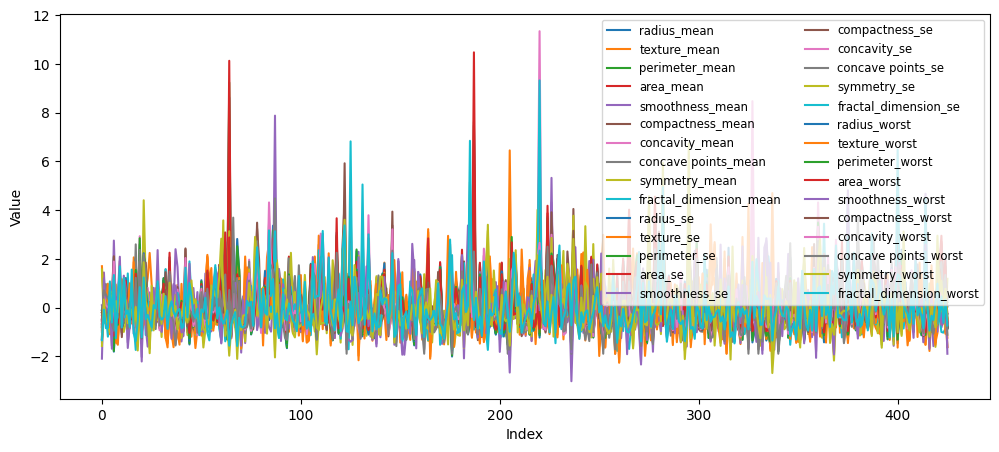

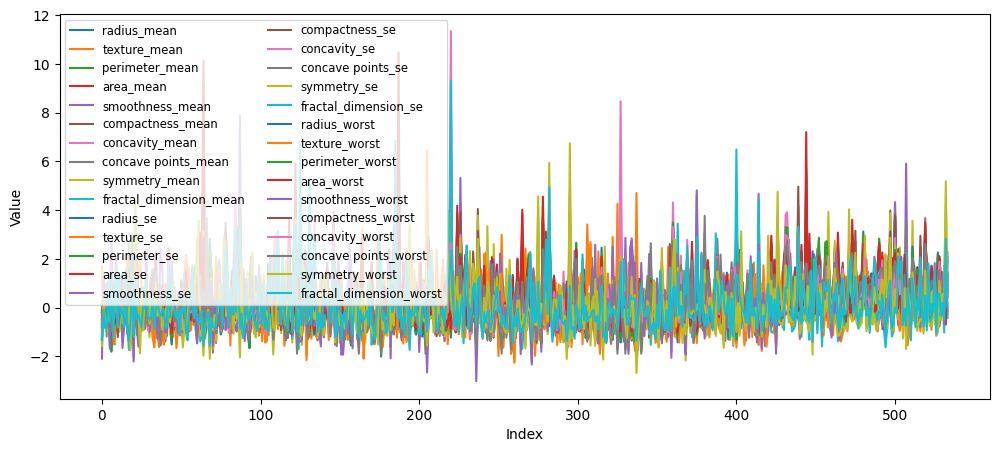

In [6]:
##################################################
###### STEP 5: VISUALIZE CLASS DISTRIBUTIONS #####
##################################################

plt.figure(figsize=(12, 5))
for i in range(X_train.shape[1]):
    plt.plot(X_train[:, i], label=features[i])
plt.legend(loc="best", fontsize="small", ncol=2)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(12, 5))
for i in range(X_resampled.shape[1]):
    plt.plot(X_resampled[:, i], label=features[i])
plt.legend(loc="best", fontsize="small", ncol=2)
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

# Step 6: Evaluation Metrics Reflection



In [8]:
##################################################
######### STEP 7: TRAIN-VALIDATION SPLIT #########
##################################################

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20)
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")
print(f"X_val: {X_val}")
print(f"y_val: {y_val}")

X_train: [[ 1.0946939   1.21747207  0.97606942 ...  0.02282839 -0.61564413
  -0.2237579 ]
 [ 0.91613451 -0.52663455  0.88543473 ...  1.12499609  0.38927926
  -0.13266222]
 [-0.74758556 -0.9249508  -0.75999679 ... -0.41803869 -0.34301507
  -0.87688633]
 ...
 [ 2.01016508  0.87807835  1.88241628 ...  1.35735322 -0.11159738
  -0.45674201]
 [-0.54068341 -0.30272897 -0.54453342 ... -0.84392485 -0.77097929
  -0.34466671]
 [-0.3281127  -0.70340212 -0.36985567 ... -0.45487952  0.20858326
  -0.77530084]]
y_train:     diagnosis
274         1
253         1
137         0
163         0
134         1
..        ...
375         0
349         0
23          1
480         0
195         0

[340 rows x 1 columns]
X_val: [[-1.51397382 -0.82124716 -1.46941919 ... -0.10863683  0.0532481
   1.00299728]
 [-1.22601137 -0.85895757 -1.23624087 ... -0.92509698 -0.08148138
  -0.09843232]
 [ 0.40313053  0.15450979  0.44874034 ...  1.52856374  0.46694684
   1.01403918]
 ...
 [-0.74191701  0.39019987 -0.7290986  ... -0

In [9]:
##################################################
### STEP 8: MODEL SELECTION WITH MANUAL SEARCH ###
##################################################

# MODELS
# 1. KNN Classifier

knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(X_train, np.asarray(y_train))

# 2. Decision Tree
# 3. Support Vector Machine
# 4. Random Forest
# 5. AdaBoost

c:\Users\ttjaa\Documents\College Part II\CSCI-635\csci-635_assignment-2\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
